In [10]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

### Basic statistics using describe

In [11]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Boxplot

<Figure size 1000x500 with 0 Axes>

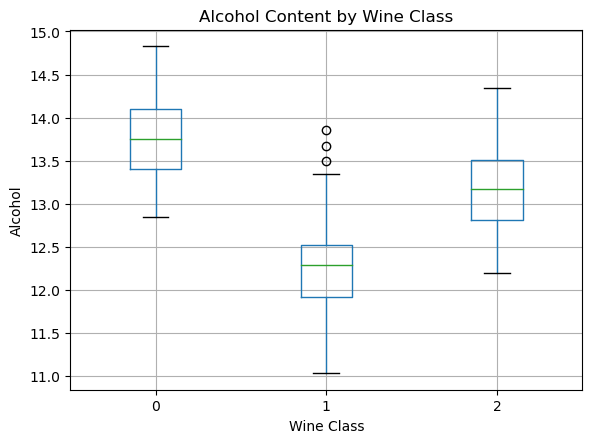

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.boxplot(column='alcohol', by='target')
plt.title("Alcohol Content by Wine Class")
plt.suptitle("")
plt.xlabel("Wine Class")
plt.ylabel("Alcohol")
plt.show()

### Scatterplot

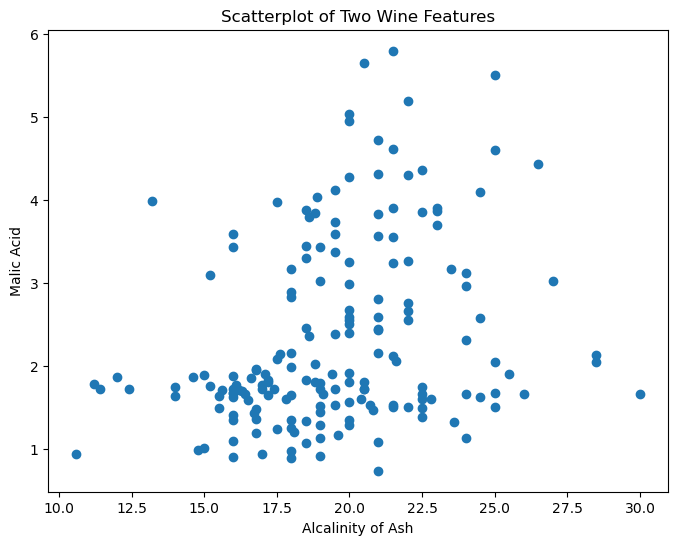

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(df['alcalinity_of_ash'], df['malic_acid'])
plt.xlabel("Alcalinity of Ash")
plt.ylabel("Malic Acid")
plt.title("Scatterplot of Two Wine Features")
plt.show()

### Co variance matrix heatmap

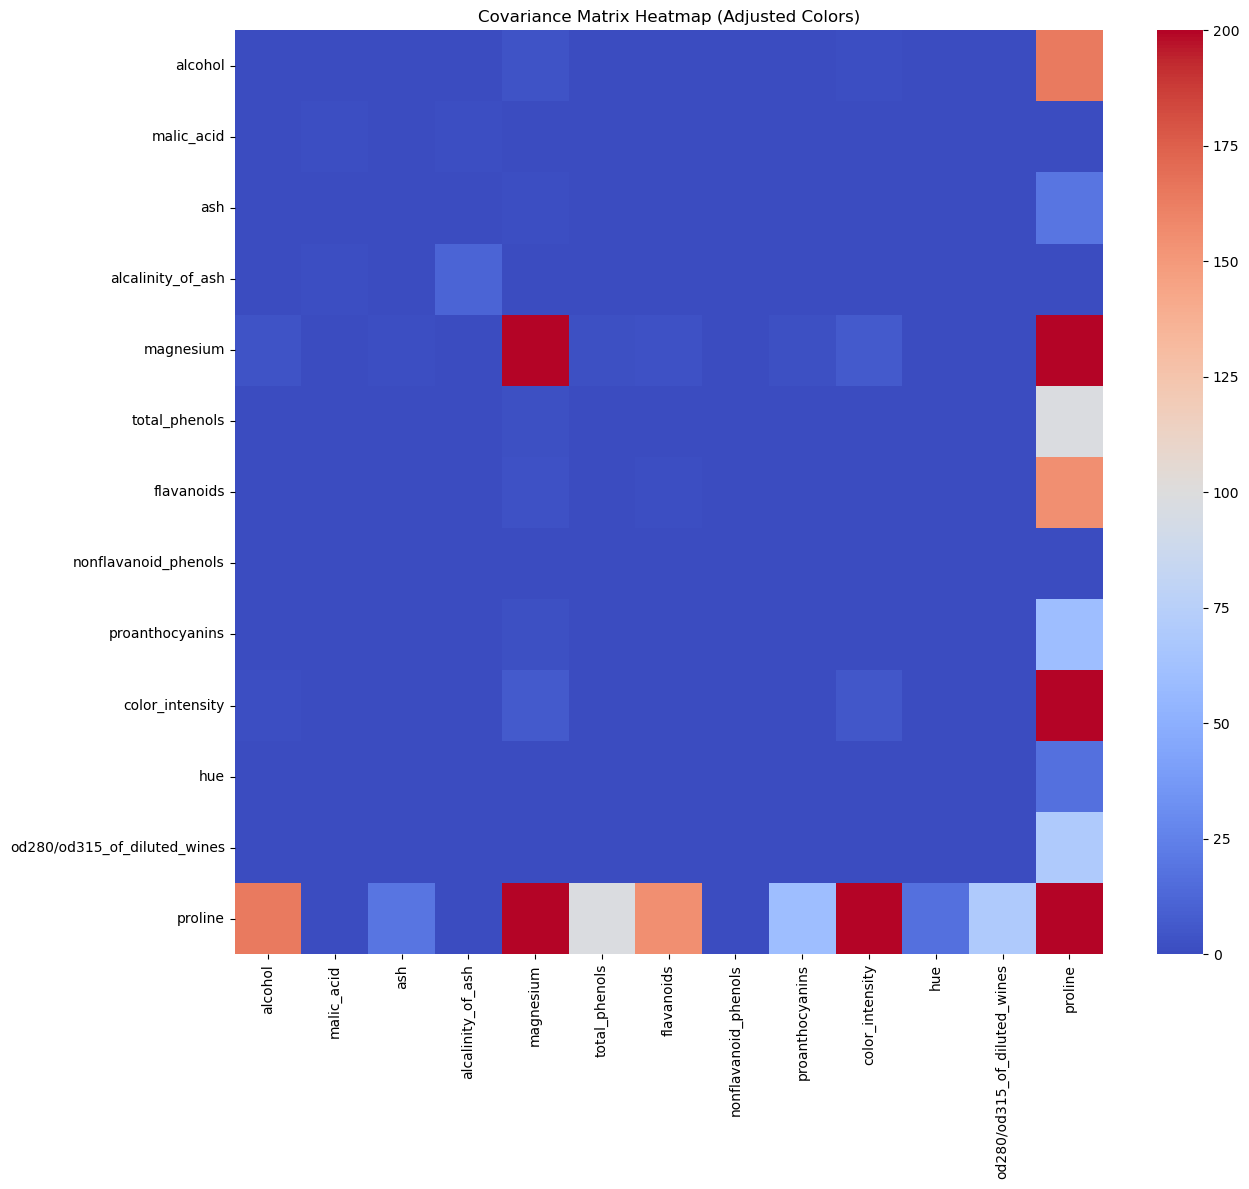

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sns.heatmap(
    cov, 
    cmap="coolwarm", 
    vmin=0,      # Force color scale minimum to 0
    vmax=200     # Reduce max scale so differences appear
)
plt.title("Covariance Matrix Heatmap (Adjusted Colors)")
plt.show()


### data scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])
scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Better class seperation using PCA

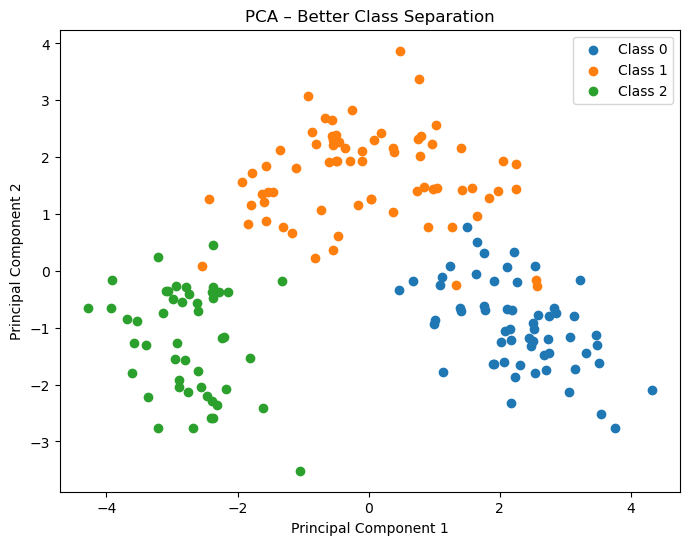

In [9]:
from sklearn.decomposition import PCA

# PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['target'] = df['target']

# Plot
plt.figure(figsize=(8,6))
for c in [0,1,2]:
    subset = pca_df[pca_df['target'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {c}')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA – Better Class Separation")
plt.legend()
plt.show()
